In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

df = pd.read_csv("D:\ITM\Data_Analysis\ZZ COGNIFYZ internship task\Clean Dataset\cleaned_dataset.csv")

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,le petit souffle,162,makati city,"third floor, century city mall, kalayaan avenu...","century city mall, poblacion, makati city","century city mall, poblacion, makati city, mak...",121.027535,14.565443,"french, japanese, desserts",1100.0,botswana pula(p),yes,no,no,no,3,4.8,dark green,excellent,314
1,6304287,izakaya kikufuji,162,makati city,"little tokyo, 2277 chino roces avenue, legaspi...","little tokyo, legaspi village, makati city","little tokyo, legaspi village, makati city, ma...",121.014101,14.553708,japanese,1200.0,botswana pula(p),yes,no,no,no,3,4.5,dark green,excellent,591
2,6300002,heat - edsa shangri-la,162,mandaluyong city,"edsa shangri-la, 1 garden way, ortigas, mandal...","edsa shangri-la, ortigas, mandaluyong city","edsa shangri-la, ortigas, mandaluyong city, ma...",121.056831,14.581404,"seafood, asian, filipino, indian",400.0,botswana pula(p),yes,no,no,no,4,4.4,green,very good,270
3,6318506,ooma,162,mandaluyong city,"third floor, mega fashion hall, sm megamall, o...","sm megamall, ortigas, mandaluyong city","sm megamall, ortigas, mandaluyong city, mandal...",121.056475,14.585318,"japanese, sushi",400.0,botswana pula(p),no,no,no,no,4,4.9,dark green,excellent,365
4,6314302,sambo kojin,162,mandaluyong city,"third floor, mega atrium, sm megamall, ortigas...","sm megamall, ortigas, mandaluyong city","sm megamall, ortigas, mandaluyong city, mandal...",121.057508,14.584450,"japanese, korean",400.0,botswana pula(p),yes,no,no,no,4,4.8,dark green,excellent,229


# Level 3 :- Customer Engagement, Service Strategy, and Behavioral Insights

---------------------------

#### Task 1 :-  Restaurant Reviews
-> Analyze the text reviews to identify the most common positive and negative keywords.

In [2]:
Rating_keyword_dist = df["Rating text"].value_counts().sort_index()

Rating_keyword_df = pd.DataFrame({
    "Rating text" : Rating_keyword_dist.index,
    "Counts" : Rating_keyword_dist.values
})

print(Rating_keyword_df)

  Rating text  Counts
0     average    3734
1   excellent     300
2        good    2096
3   not rated    2148
4        poor     186
5   very good    1078


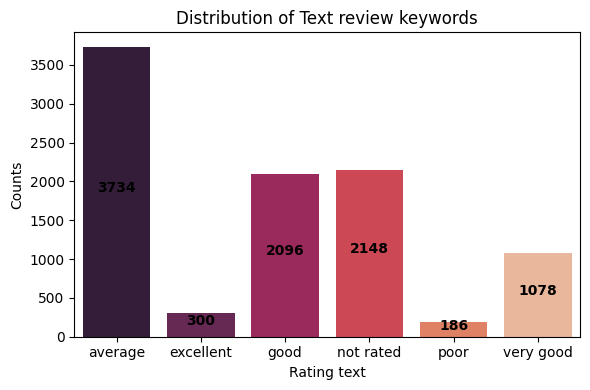

In [3]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data=Rating_keyword_df, x='Rating text', y='Counts', palette='rocket', hue='Rating text')

for i, v in enumerate(Rating_keyword_df['Counts']):
    ax.text(i, v / 2, str(v), ha='center', fontweight='bold')

plt.title("Distribution of Text review keywords")
plt.xlabel("Rating text")
plt.ylabel("Counts")
plt.tight_layout()
plt.show()

- The most common positive keywords are **Good** and **Very Good**, based on the `Rating text` column.
- This indicates that customers are generally satisfied with:
  - The **taste** of the food,
  - The **service quality**, and
  - The overall **restaurant environment**.

- The most common nagative keywords are **poor** and **not rated**.
- This indicates that customers are generally not satisfied with:
  - The **taste** of the food, **service quality** and The overall **restaurant enviroment**.
  - also, many restaurants are **not rated**, it means they open newly and not too many customers are visited the restaurants.

- The most common review category is the **average**, which indicating that the Customers experience is not too good aslo not too bad.


-> Calculate the average length of reviews and explore if there is a relationship between review length and rating.


In [4]:
df['Review_Length'] = df['Rating text'].str.len()

average_length = df['Review_Length'].mean().round(2)
print(f"Average review phrase length: {average_length} characters")


Average review phrase length: 7.02 characters


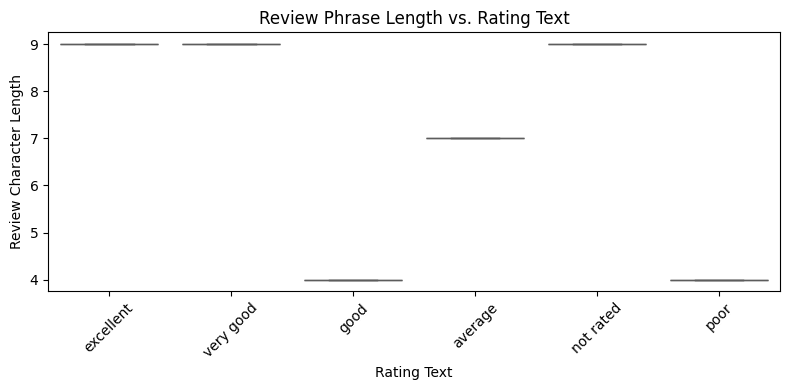

In [5]:
plt.figure(figsize=(8, 4))

sns.boxplot(
    data=df,x='Rating text',y='Review_Length',hue='Rating text',palette='coolwarm')

plt.title("Review Phrase Length vs. Rating Text")
plt.xlabel("Rating Text")
plt.ylabel("Review Character Length")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The average length of review phrases (Rating Text) is approximately **7 characters**.

- Longer review phrases like **Very Good** and **Excellent** slightly increase the average length.

- However, there is no meaningful relationship between review character length and rating sentiment, since review categories are fixed and predefined.

- In this dataset, review text length doesn’t indicate stronger or weaker opinions, as customers choose from fixed review labels rather than writing actual comments.


-----------

#### Task 2 :- Votes Analysis
 
-> Identify the restaurants with the highest and lowest number of votes.


In [6]:
# Top 5 highest voted restaurants
highest_voted_restaurants = df[['Restaurant Name', 'Votes']].sort_values(by='Votes', ascending=False).head(5)

print(highest_voted_restaurants)



                Restaurant Name  Votes
719                        toit  10934
726                    truffles   9667
3985           hauz khas social   7931
2403                  peter cat   7574
730   ab's - absolute barbecues   6907


- **toit** restaurant is the highest voted restaurant, followed by **truffles**, **hauz khas social**, **peter cat** and **ab's - absolute barbecues**.


In [7]:
# Top 5 lowest voted restaurants
lowest_voted_restaurants = df[['Restaurant Name', 'Votes']].sort_values(by='Votes', ascending=True).head(5)

print(lowest_voted_restaurants)

           Restaurant Name  Votes
1171       lavi foji dhaba      0
1169  gopi sweets & caters      0
1164             aha bites      0
1163    achoos food corner      0
9089             cafe' wow      0


- A significant number of restaurants have received **0 votes** in the dataset.

- This could be due to several reasons, but the most likely explanation is that these restaurants are **newly opened** and have not yet received customer feedback.

- Other possible reasons:
  - Restaurants may not be popular or visible on the platform.
  - Customers may not actively rate or vote for them.
  - Restaurants might be located in less active regions.

-> Analyze if there is a correlation between the number of votes and the rating of a restaurant.

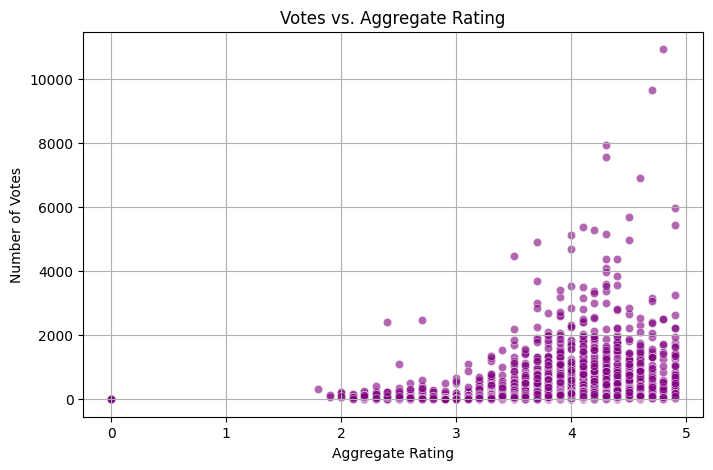

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Aggregate rating', y='Votes', alpha=0.6, color='purple')

plt.title("Votes vs. Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Votes")
plt.grid(True)
plt.show()

- There is a **positive relationship** between a restaurant's rating and its number of votes:
  - Higher-rated restaurants generally receive more customer votes.
  - Poorly-rated or unrated restaurants tend to receive minimal engagement.

- However, the relationship is not perfectly linear — certain high-rated restaurants achieve exceptionally high votes, possibly due to brand recognition or marketing efforts.

This analysis highlights that **customer satisfaction** (ratings) and **customer engagement** (votes) are related but influenced by other factors like visibility, brand strength, and customer base.


In [9]:
correlation = df[['Votes', 'Aggregate rating']].corr().iloc[0,1]

print(f"Correlation between votes and rating: {correlation:.2f}")


Correlation between votes and rating: 0.31


- Restaurants with higher ratings generally attract more votes, but the relationship is weak to moderate.

- Correlation: 0.31 → Ratings help, but votes depend on brand, location, and visibility.

-----------------

#### Task 3 :- Price Range vs. Online Delivery and Table Booking
 
-> Analyze if there is a relationship between the price range and the availability of online delivery and table booking. 

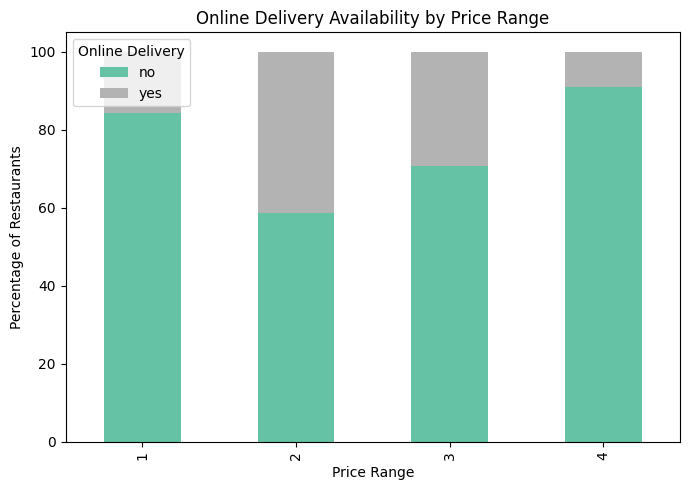

In [10]:
# Price Range vs. Online Delivery Availability

# Group and count how many restaurants offer online delivery at each price level
online_delivery_df = df.groupby(['Price range', 'Has Online delivery']).size().unstack().fillna(0)

# Calculate percentages for better clarity
online_delivery_percent = (online_delivery_df.T / online_delivery_df.sum(axis=1)).T * 100

online_delivery_percent.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='Set2')
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.legend(title="Online Delivery")
plt.tight_layout()
plt.show()


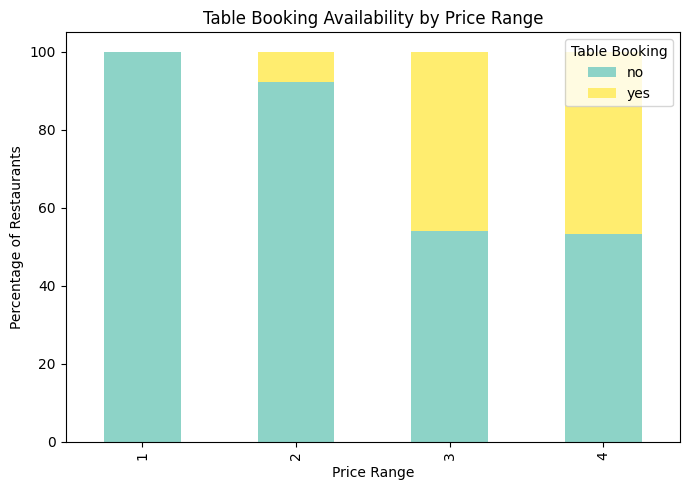

In [11]:
# Price Range vs. Table Booking Availability
table_booking_df = df.groupby(['Price range', 'Has Table booking']).size().unstack().fillna(0)

table_booking_percent = (table_booking_df.T / table_booking_df.sum(axis=1)).T * 100

table_booking_percent.plot(kind='bar', stacked=True, figsize=(7, 5), colormap='Set3')
plt.title("Table Booking Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.legend(title="Table Booking")
plt.tight_layout()
plt.show()


-> Determine if higher-priced restaurants are more likely to offer these services.

- **Higher-priced restaurants prioritize table booking**, focusing on exclusive dine-in experiences.

- **Mid-range restaurants lead in online delivery**, balancing affordability with convenience.

- Premium pricing signals dine-in service priority, while affordable restaurants focus on delivery growth.
